In [1]:
from functions_sup import *

In [2]:
# import data
ef = pd.read_csv('/Users/I572269/Downloads/predictive maintenance/classData.csv',sep=',')

In [3]:
# pre-process
ef=pre_process_EF(ef)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fault between phase A and ground'),
  Text(0, 1, 'Fault between phases A,B and ground'),
  Text(0, 2, 'Fault between phase B and phase C'),
  Text(0, 3, 'Fault between all three phases'),
  Text(0, 4, 'Three phase symmetrical fault'),
  Text(0, 5, 'No failure')])

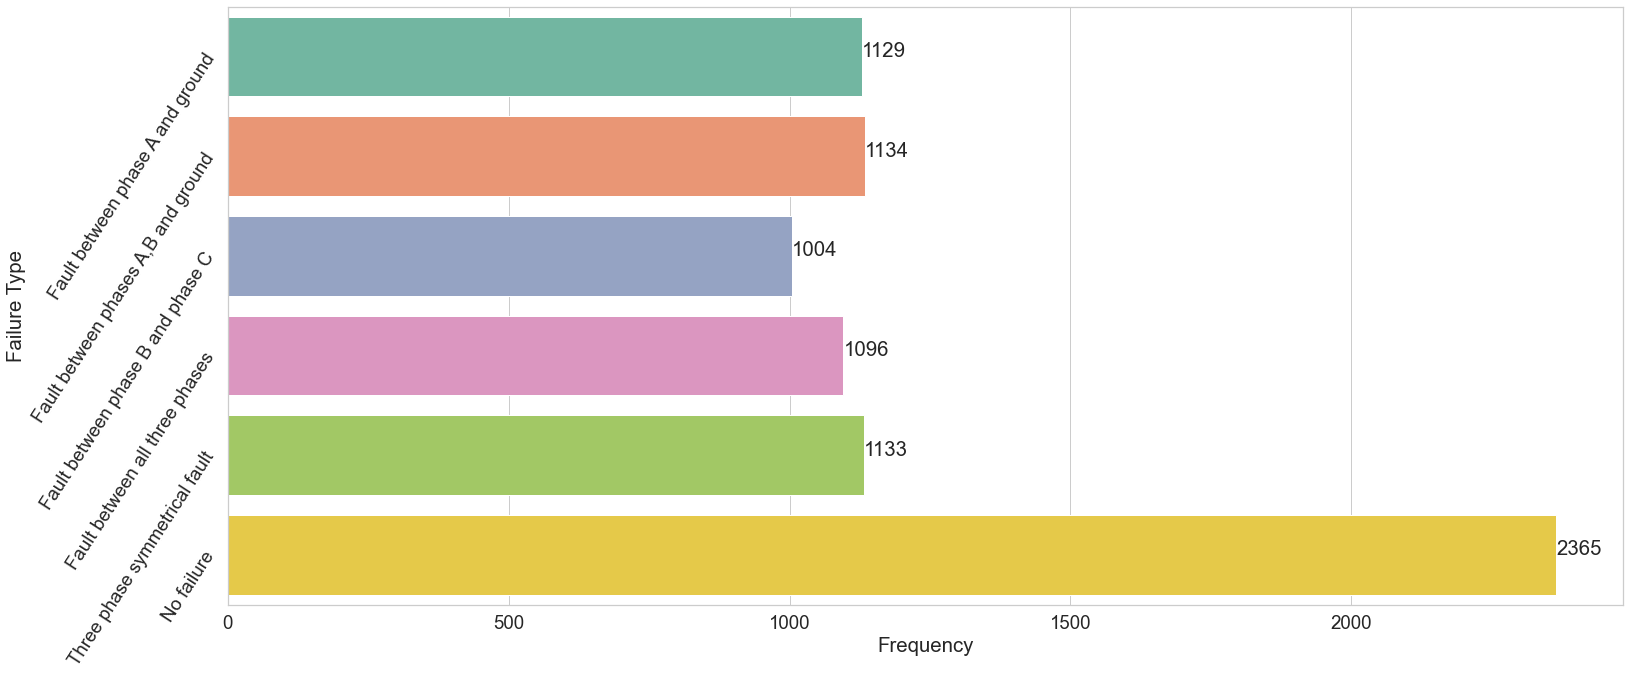

In [4]:
# data visualization
plt.figure(figsize=(25,11))
sns.set_theme(font_scale=1.7,style="whitegrid")
pl = sns.countplot(y=ef["Failure Type"],palette="Set2")
pl.set(xlabel="Frequency")
for p in pl.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        pl.annotate(percentage, (x, y))
plt.yticks(rotation=57)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/unbalancedEF.png') 

In [4]:
le = LabelEncoder()
# categories follow the alphabetic order
# (0):Fault between all three phases
# (1): Fault between phase A and ground
# (2): Fault between phase B and phase C
# (3): Fault between phases A,B and ground
# (4): No failure 
# (5): Three phase symmetrical fault
ef['Failure Type'] = le.fit_transform(ef.loc[:,["Failure Type"]].values)

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Correlation Matrix')

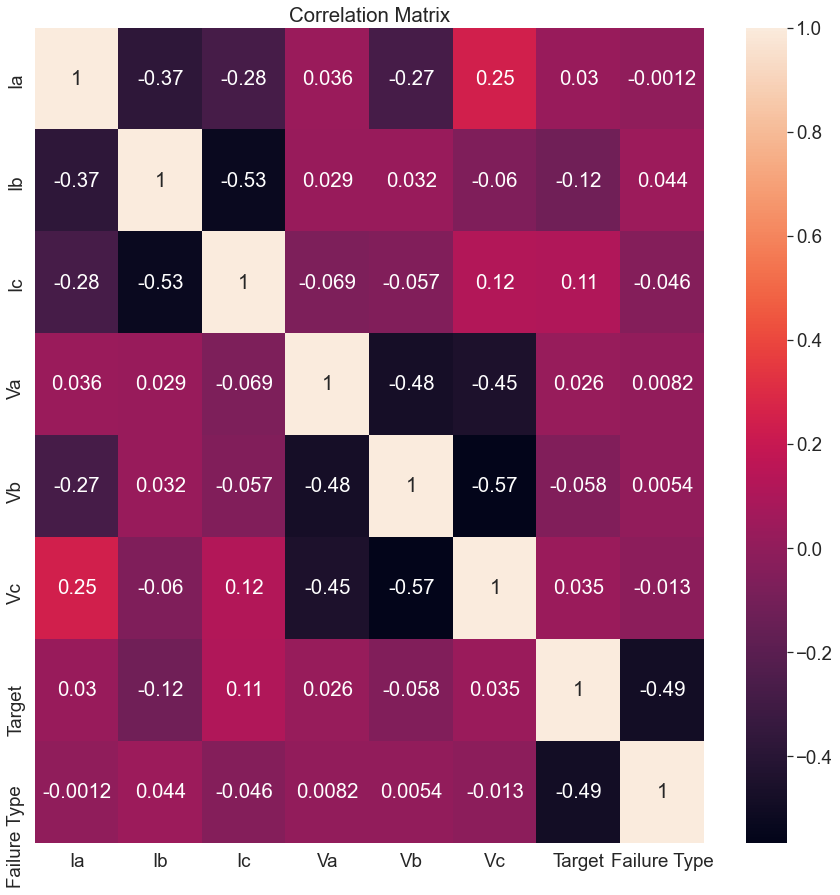

In [6]:
plt.figure(figsize=(15,15))
pl = sns.heatmap(ef.corr(), annot=True)
pl.set_title("Correlation Matrix")
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/correlationEF.png') 

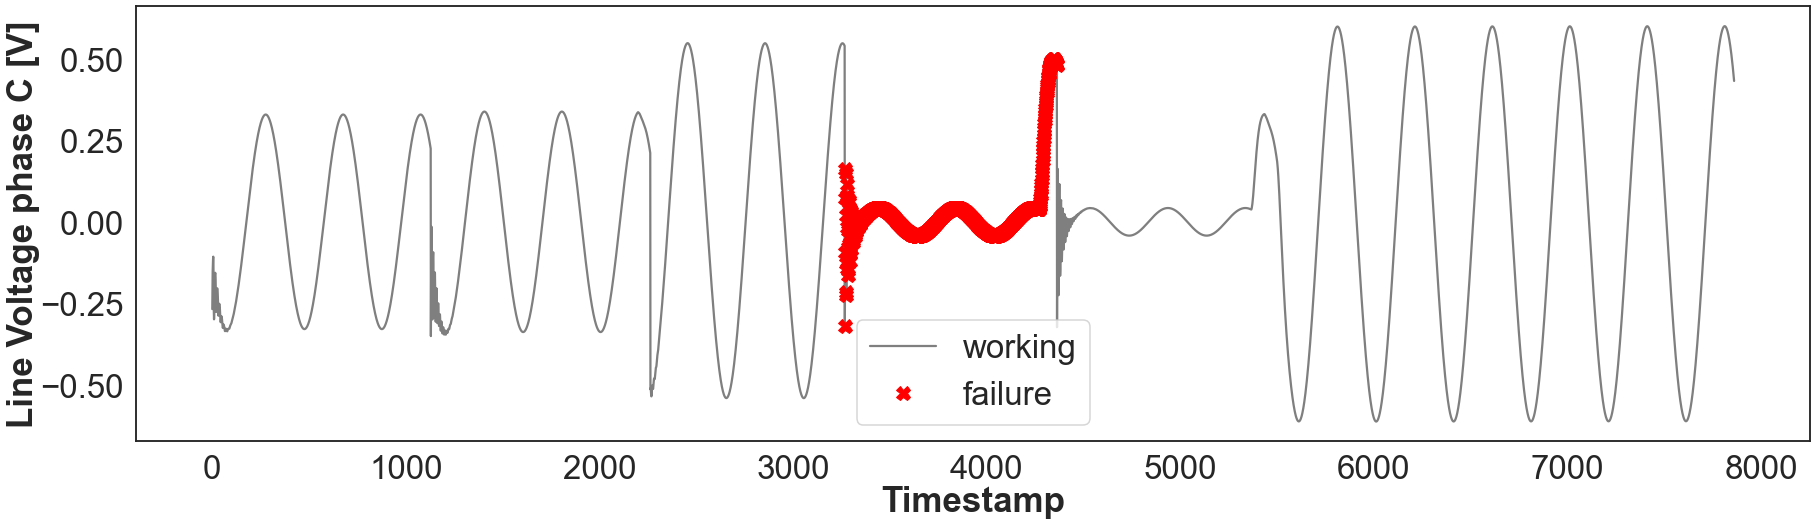

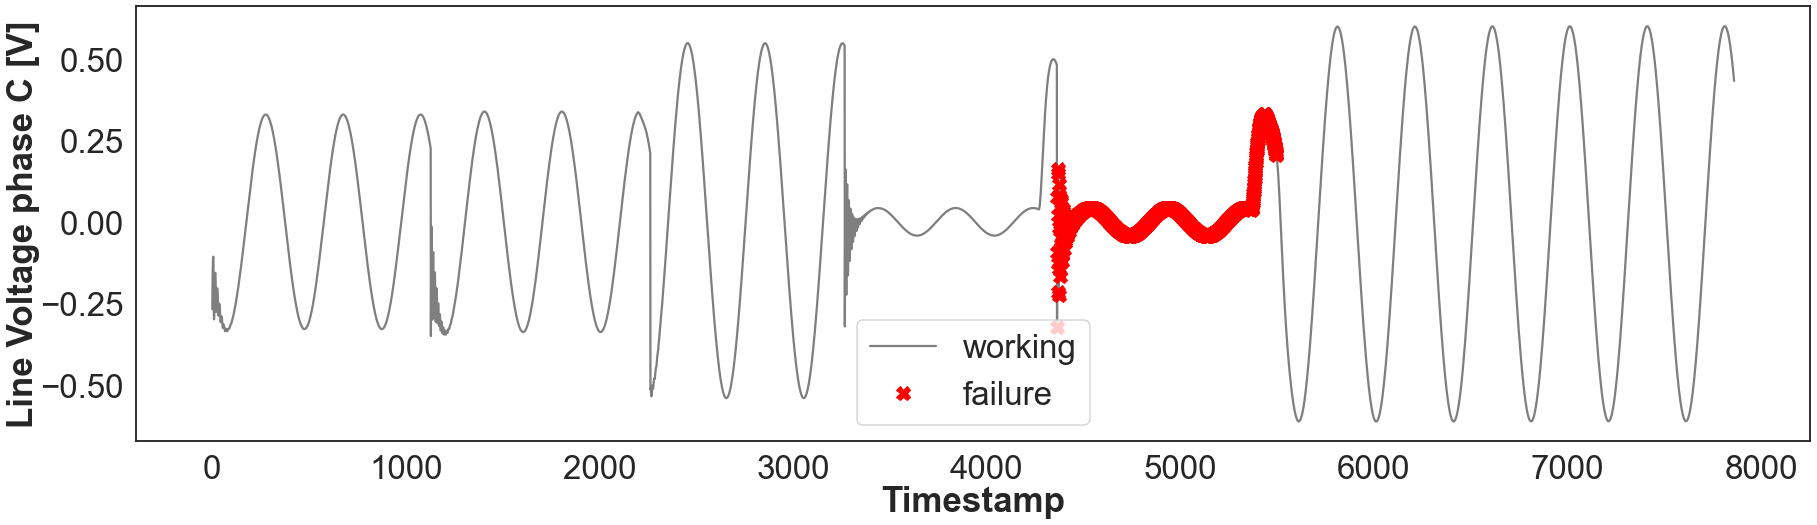

In [7]:
TF=ef[ef['Failure Type']==0]
sns.set_theme(style="white")
sns.set_context('talk')
# Set the axes labels font size
plt.rc('axes', labelsize=35)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=33)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=33)
# Set the legend font size
plt.rc('legend', fontsize=33)
_ = plt.figure(figsize=(30,8))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage phase C [V]',fontweight='bold',labelpad=0)
_ = plt.xlabel('Timestamp',fontweight='bold',labelpad=0)
_ =plt.legend()
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/faultbetweenallthreephasesEF1.png')
TF=ef[ef['Failure Type']==5]
sns.set_context('talk')
# Set the axes labels font size
plt.rc('axes', labelsize=35)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=33)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=33)
# Set the legend font size
plt.rc('legend', fontsize=33)
_ = plt.figure(figsize=(30,8))
_ = plt.plot(ef["Vc"], color='black', label='working',alpha=0.5)
_ = plt.plot(TF["Vc"], linestyle='none', marker='X', color='red', markersize=14, label='failure')
_ = plt.ylabel('Line Voltage phase C [V]',fontweight='bold',labelpad=0)
_ = plt.xlabel('Timestamp',fontweight='bold',labelpad=0)
_ =plt.legend()
#plt.savefig('/Users/nicolaronzoni/Desktop/threephasesymmetricalfaultEF2.png')

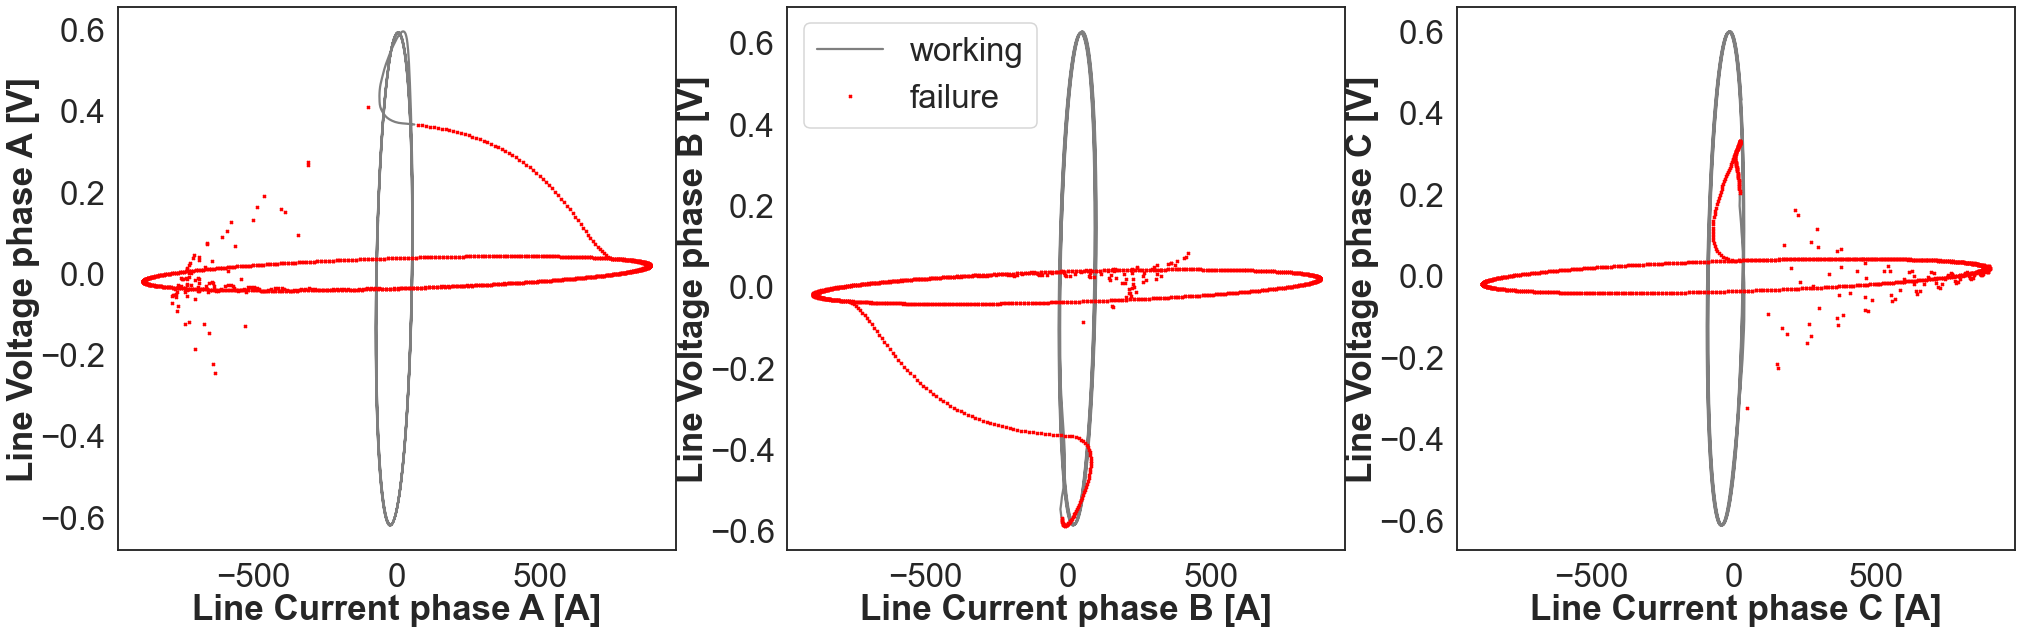

In [8]:
TF=ef[ef['Failure Type']==5]
NF=ef[ef['Failure Type']==4]
# Set the axes labels font size
plt.rc('axes', labelsize=35)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=33)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=33)
# Set the legend font size
plt.rc('legend', fontsize=33)
plt.figure(figsize=(34,10))
_=plt.subplot(1,3,1)
_=plt.plot(NF["Ia"],NF["Va"], color='black', label='working',alpha=0.5)
_=plt.plot(TF['Ia'],TF['Va'],linestyle='none', marker='X', color='red', markersize=3, label='failure')
_ = plt.ylabel('Line Voltage phase A [V]',fontweight='bold',labelpad=0)
_ = plt.xlabel('Line Current phase A [A]',fontweight='bold',labelpad=0)
_=plt.subplot(1,3,2)
_=plt.plot(NF["Ib"],NF["Vb"], color='black', label='working',alpha=0.5)
_=plt.plot(TF['Ib'],TF['Vb'],linestyle='none', marker='X', color='red', markersize=3, label='failure')
_ = plt.ylabel('Line Voltage phase B [V]',fontweight='bold',labelpad=0)
_ = plt.xlabel('Line Current phase B [A]',fontweight='bold',labelpad=0)
_=plt.legend(loc="upper left")
_=plt.subplot(1,3,3)
_=plt.plot(NF["Ic"],NF["Vc"], color='black', label='working',alpha=0.5)
_=plt.plot(TF['Ic'],TF['Vc'],linestyle='none', marker='X', color='red', markersize=3, label='failure')
_ = plt.ylabel('Line Voltage phase C [V]',fontweight='bold',labelpad=0)
_ = plt.xlabel('Line Current phase C [A]',fontweight='bold',labelpad=0)
#plt.savefig('/Users/nicolaronzoni/Desktop/threephasesymmetricalfaultEF1.png')

In [5]:
evaluation_rf(ef,'roc_auc_ovr')

|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9628   |  1.256    |  3.909    |  1.01     |  0.9916   |  4.951    |  6.812    |  192.6    |
|  3        |  0.9674   |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  4        |  0.9692   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  6        |  0.9695   |  0.4127   |  6.923    |  1.45     |  0.4645   |  6.911    |  9.228    |  140.9    |
|  12       |  0.9695   |  0.5306   |  8.917    |  1.441    |  0.1624   |  5.459    |  9.615    |  154.6    |
|  18       |  0.9695   |  1.121    |  7.087    |  1.373    |  0.579    |  5.409    |  12.6     |  155.5    |
|  25       |  0.9698   |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
{'target':

0         1
precision  78.540000  0.689138
recall     78.784000  0.547929
f1         78.627000  0.627642
time       11.964063  5.505797

In [6]:
evaluation_ada(ef,'roc_auc_ovr')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.9573   |  0.1149   |  211.7    |
|  3        |  0.9575   |  0.1036   |  92.64    |
|  4        |  0.9578   |  0.0818   |  144.7    |
|  5        |  0.9584   |  0.09909  |  128.8    |
|  7        |  0.9597   |  0.0865   |  192.6    |
{'learning_rate': 0.08649541275609693, 'n_estimators': 192}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.9595   |  0.1149   |  211.7    |
|  3        |  0.9595   |  0.1036   |  92.64    |
|  4        |  0.9606   |  0.0818   |  144.7    |
|  7        |  0.961    |  0.0865   |  192.6    |
|  14       |  0.9626   |  0.1137   |  69.27    |
{'learning_rate': 0.1137054301919375, 'n_estimators': 69}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  4        |  0.9596   |  0.0818   |  144.7    |
|  9        |  0.9599   |  0.117

0         1
precision  76.849000  2.240067
recall     75.810000  2.785135
f1         74.696000  2.435922
time        2.315625  0.814727

In [7]:
evaluation_gb(ef,'roc_auc_ovr')

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  3        |  0.9715   |  0.1297   |  4.194    |  0.8932   |  4.473    |  6.74     |  236.9    |  0.9588   |
|  15       |  0.9717   |  0.09684  |  8.417    |  0.8118   |  5.233    |  8.074    |  250.7    |  0.9819   |
{'learning_rate': 0.09683993966509455, 'max_depth': 8, 'max_features': 0.8118214162455913, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 250, 'subsample': 0.9818837162387906}
|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  2        |  0.9693   |  0.1136   |  3.909    |  0.8675   |  7.963    |  8.377    |  79.59    |  0.9339   |
|  3        |  0.9727   |  0.1297   | 

0         1
precision  84.785000  0.426569
recall     84.799000  0.413963
f1         84.788000  0.416515
time       27.460938  4.365014

In [8]:
evaluation_xgb(ef,'roc_auc_ovr')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.9666   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.9668   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.9676   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  5        |  0.9679   |  0.2155   |  0.1451   |  0.8528   |  2.22     |  11.63    |  84.22    |
|  11       |  0.9683   |  0.2088   |  0.09429  |  0.7076   |  3.197    |  13.46    |  154.0    |
|  19       |  0.969    |  0.1183   |  0.1304   |  1.142    |  4.718    |  13.22    |  241.6    |
|  26       |  0.9709   |  0.2976   |  0.1592   |  1.079    |  2.171    |  14.48    |  244.0    |
|  27       |  0.9709   |  0.1276   |  0.1588   |  1.175    |  2.123    |  15.76    |  247.5    |
|  30       |  0.970

0         1
precision  79.094000  0.836052
recall     79.663000  0.739565
f1         79.322000  0.789089
time       14.317187  3.247704

In [9]:
evaluation_nn(ef,'roc_auc_ovr')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.9836   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9861   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  19       |  0.9965   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  6        |  0.98     |  1.92     |  0.009668 |  62.7     |  0.6345   |  0.04916  |  1.004e+0 |  0.05309  |  9.768    |  0.09982  |  0.2242   |
|  10       |  0.9907   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  12       |  0.9941   |  3.603    |  0.003405 |  89.11    |  1.841    |  1.118    |  1.077e+0 |  0.8962   |  12.72    |  0.4517   |  0.3712   |
{'activation': 'relu', 'momentum': 0.8961647257520929, 'validation_fraction': 0.37117054865894616, 'batch_size': 89, 'learning_rate': 'invscaling', 'solver': 'lbfgs', 'early_stopping': False, 'max_iter': 1077136, 'alpha': 0.0034045748038534327, 'hidden_layer_sizes': (12

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.9805   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9928   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.9839   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9945   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.9792   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9925   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  12       |  0.9874   |  3.603    |  0.003405 |  89.11    |  1.841    |  1.118    |  1.077e+0 |  0.8962   |  12.72    |  0.4517   |  0.3712   |
|  19       |  0.9953   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-

0          1
precision   92.3880   7.478814
recall      92.2890   7.539545
f1          92.2010   7.618099
time       200.8375  85.691708

In [10]:
evaluation_rf(ef,'balanced_accuracy')

|   iter    |  target   | criterion | max_depth | max_fe... | max_sa... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------------------------------
|  3        |  0.774    |  1.858    |  4.194    |  1.394    |  0.2065   |  4.296    |  15.01    |  216.4    |
|  4        |  0.7953   |  2.513    |  8.522    |  2.963    |  0.6195   |  7.255    |  10.21    |  69.27    |
|  11       |  0.798    |  1.38     |  9.706    |  0.442    |  0.9161   |  5.992    |  11.92    |  195.5    |
|  17       |  0.799    |  1.952    |  9.401    |  1.118    |  0.7942   |  7.585    |  12.2     |  93.0     |
|  24       |  0.7993   |  1.233    |  9.407    |  2.468    |  0.5509   |  4.467    |  6.116    |  239.3    |
|  25       |  0.8015   |  1.532    |  8.745    |  0.2836   |  0.8231   |  4.249    |  12.35    |  250.0    |
|  29       |  0.8025   |  2.99     |  10.0     |  0.0      |  1.0      |  4.0      |  16.0     |  169.5    |
{'target':

0         1
precision  78.893000  0.613932
recall     79.189000  0.548867
f1         79.021000  0.583942
time        8.682813  1.585919

In [11]:
evaluation_ada(ef,'balanced_accuracy')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.7444   |  0.1149   |  211.7    |
|  5        |  0.7574   |  0.09909  |  128.8    |
|  9        |  0.7605   |  0.1173   |  86.73    |
|  14       |  0.7625   |  0.1137   |  69.27    |
|  21       |  0.764    |  0.1139   |  86.75    |
|  25       |  0.7725   |  0.08985  |  86.75    |
{'learning_rate': 0.08985393938969438, 'n_estimators': 86}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  2        |  0.7684   |  0.1149   |  211.7    |
|  14       |  0.7706   |  0.1137   |  69.27    |
|  21       |  0.7732   |  0.085    |  69.22    |
|  24       |  0.7772   |  0.1073   |  69.21    |
{'learning_rate': 0.10730843053338376, 'n_estimators': 69}
|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  4        |  0.7699   |  0.0818   |  144.7    |
|  12       |  0.771    |  0.145

0         1
precision  75.12800  2.185314
recall     74.60800  2.634956
f1         73.12800  2.281650
time        2.14375  0.651471

In [5]:
evaluation_gb(ef,'balanced_accuracy')

|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
|  3        |  0.8297   |  0.1297   |  4.194    |  0.8932   |  4.473    |  6.74     |  236.9    |  0.9588   |
|  4        |  0.8331   |  0.1472   |  8.522    |  0.9982   |  6.309    |  14.14    |  144.9    |  0.8055   |
|  7        |  0.8353   |  0.1055   |  9.578    |  0.9837   |  7.255    |  6.341    |  245.1    |  0.9901   |
|  12       |  0.8366   |  0.0942   |  8.917    |  0.8964   |  4.277    |  9.647    |  133.4    |  0.8944   |
{'learning_rate': 0.09419605312094573, 'max_depth': 8, 'max_features': 0.8964177553627364, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 133, 'subsample': 0.894412699905483}
|   iter    |  target   | learni... | max_depth | max_fe... | min_sa... | min_sa... | n_esti... | subsample |
---------------------------------------

0          1
precision  84.468000   0.484236
recall     84.463000   0.470958
f1         84.455000   0.476241
time       54.648438  10.438031

In [6]:
evaluation_xgb(ef,'balanced_accuracy')

|   iter    |  target   | colsam... |    eta    |   gamma   | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------------------
|  2        |  0.7852   |  0.1045   |  0.1136   |  0.7432   |  4.701    |  15.93    |  109.6    |
|  3        |  0.7892   |  0.1162   |  0.1336   |  0.9727   |  4.194    |  11.73    |  86.73    |
|  4        |  0.7915   |  0.1148   |  0.1521   |  1.076    |  8.725    |  14.52    |  254.3    |
|  6        |  0.7918   |  0.2634   |  0.1358   |  0.9392   |  4.194    |  15.99    |  90.5     |
|  11       |  0.7972   |  0.2088   |  0.09429  |  0.7076   |  3.197    |  13.46    |  154.0    |
|  19       |  0.8008   |  0.1183   |  0.1304   |  1.142    |  4.718    |  13.22    |  241.6    |
|  26       |  0.8016   |  0.2998   |  0.1063   |  0.8904   |  2.216    |  15.95    |  242.4    |
|  28       |  0.8058   |  0.1      |  0.16     |  1.2      |  2.0      |  16.0     |  247.4    |
|  30       |  0.806

0         1
precision  79.360000  0.618349
recall     79.936000  0.520581
f1         79.576000  0.585381
time       20.046875  1.675497

In [7]:
evaluation_nn(ef,'balanced_accuracy')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.8808   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9034   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  19       |  0.9692   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.9256   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  12       |  0.9546   |  3.603    |  0.003405 |  89.11    |  1.841    |  1.118    |  1.077e+0 |  0.8962   |  12.72    |  0.4517   |  0.3712   |
{'activation': 'relu', 'momentum': 0.8961647257520929, 'validation_fraction': 0.37117054865894616, 'batch_size': 89, 'learning_rate': 'invscaling', 'solver': 'lbfgs', 'early_stopping': False, 'max_iter': 1077136, 'alpha': 0.0034045748038534327, 'hidden_layer_sizes': (12,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida..

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.8704   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.951    |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.8841   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9627   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}


C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  10       |  0.8547   |  3.359    |  0.000537 |  38.81    |  1.736    |  2.015    |  1.03e+06 |  0.7344   |  12.71    |  0.6294   |  0.794    |
|  19       |  0.9459   |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-

C:\Users\I572269\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  12       |  0.906    |  3.603    |  0.003405 |  89.11    |  1.841    |  1.118    |  1.077e+0 |  0.8962   |  12.72    |  0.4517   |  0.3712   |
|  19       |  0.966    |  2.947    |  0.006418 |  44.24    |  0.9469   |  0.8015   |  1.087e+0 |  0.2669   |  14.84    |  0.6385   |  0.2948   |
{'activation': 'tanh', 'momentum': 0.2668889835592493, 'validation_fraction': 0.2947969556385823, 'batch_size': 44, 'learning_rate': 'constant', 'solver': 'lbfgs', 'early_stopping': True, 'max_iter': 1086826, 'alpha': 0.006418451694981393, 'hidden_layer_sizes': (14,)}
|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-

0          1
precision   92.388   7.478814
recall      92.289   7.539545
f1          92.201   7.618099
time       116.600  38.050141

In [8]:
stop here 

SyntaxError: invalid syntax (2391973759.py, line 1)

In [ ]:
# split the data train and test 
split=split_training_testing(ef,0.33)

In [ ]:
# gradient boost classifier 
params_gb=grid_gbm_cv(split[2],split[4],'micro','poi')

|   iter    |  target   | learni... | max_depth | max_fe... | n_esti... | subsample |
-------------------------------------------------------------------------------------
|  1        |  0.8412   |  0.616    |  3.353    |  0.8872   |  133.8    |  0.8591   |
|  2        |  0.8089   |  0.1577   |  2.18     |  0.884    |  96.71    |  0.8675   |
|  3        |  0.5781   |  0.9908   |  3.902    |  0.8162   |  126.9    |  0.9242   |
|  4        |  0.8388   |  0.2815   |  5.73     |  0.8237   |  85.18    |  0.9802   |
|  5        |  0.8347   |  0.796    |  8.725    |  0.963    |  149.4    |  0.9155   |
|  6        |  0.5916   |  0.8156   |  5.371    |  0.8055   |  111.8    |  0.8211   |
|  7        |  0.8335   |  0.819    |  7.582    |  0.9131   |  99.2     |  0.9997   |
|  8        |  0.8392   |  0.1467   |  6.923    |  0.897    |  108.4    |  0.9456   |
|  9        |  0.8423   |  0.3296   |  5.204    |  0.8638   |  146.3    |  0.9837   |
|  10       |  0.706    |  0.8157   |  2.273    |  0.9

In [ ]:
# predict the class 
classifier = GradientBoostingClassifier(random_state=123, **params_gb)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# performance micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  88.55 %
Test Recall (Failure Type)         :  88.55 %
Test F1-Score (Failure Type) :  88.55 %
Test Balanced Accuracy Score (Failure Type): 86.37 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  86.36 %
Test Recall (Failure Type)         :  86.37 %
Test F1-Score (Failure Type) :  86.34 %
Test Balanced Accuracy Score (Failure Type): 86.37 %
()


In [ ]:
# Performance Metrics machine status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.95 %
Test Recall (Machine Status)         :  100.0 %
Test F1-score (Machine Status) :  99.97 %
()


()

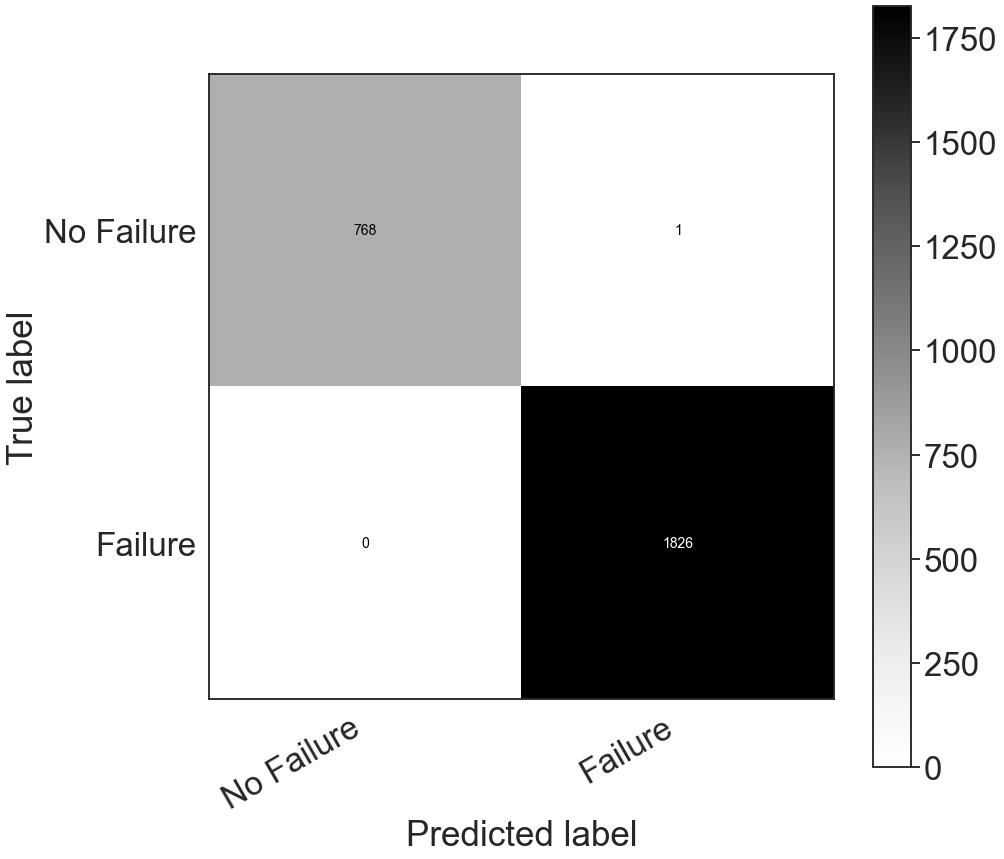

In [ ]:
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/gradientboostmachinestatusEF.png')


()

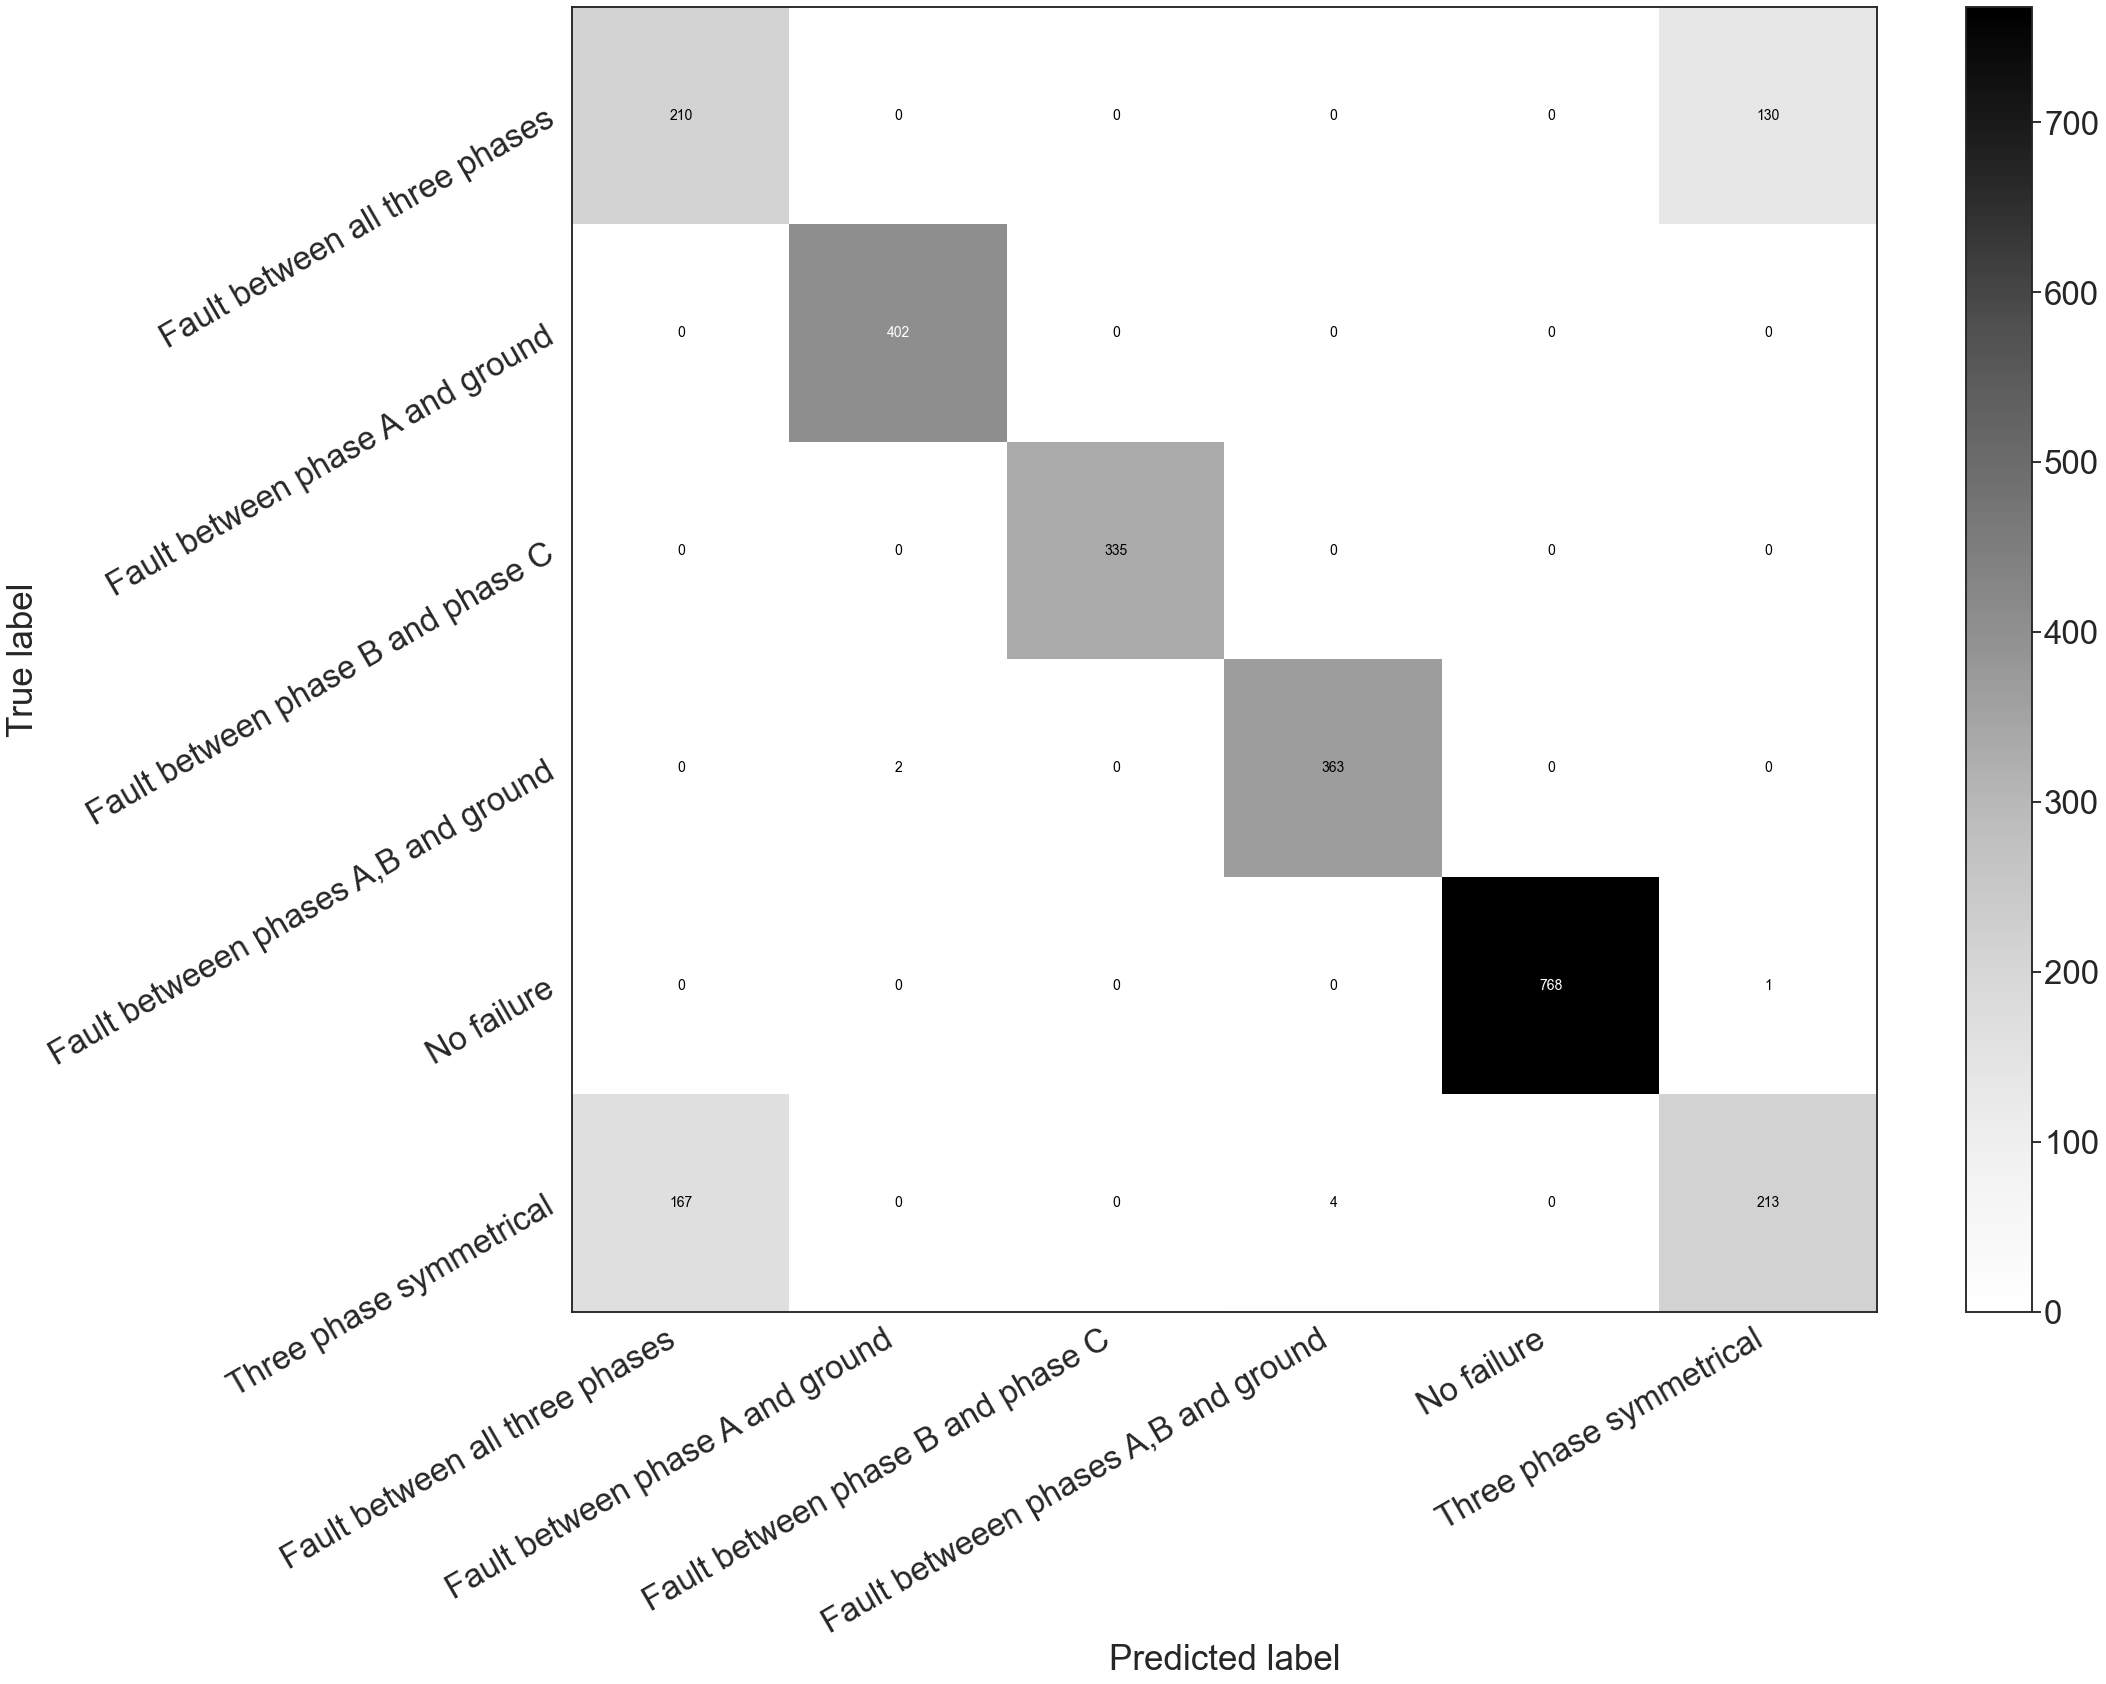

In [ ]:
confusion_failure_type(split[5],y_pred_test,['Fault between all three phases','Fault between phase A and ground','Fault between phase B and phase C','Fault betweeen phases A,B and ground','No failure','Three phase symmetrical'])
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/gradientboostfailuretypeEF.png')


In [ ]:
# Ada boost classifier 
params_ab=grid_abm_cv(split[2],split[4],'micro','ei')

|   iter    |  target   | learni... | n_esti... |
-------------------------------------------------
|  1        |  0.7156   |  0.616    |  91.83    |
|  2        |  0.7549   |  0.4417   |  133.8    |
|  3        |  0.7472   |  0.3024   |  90.44    |
|  4        |  0.6572   |  0.03225  |  109.4    |
|  5        |  0.7274   |  0.2463   |  103.6    |
|  6        |  0.6435   |  0.9908   |  96.64    |
|  7        |  0.778    |  0.09038  |  126.9    |
|  8        |  0.7211   |  0.625    |  99.2     |
|  9        |  0.73     |  0.4716   |  88.29    |
|  10       |  0.7766   |  0.08322  |  143.1    |
|  11       |  0.6885   |  0.796    |  138.8    |
|  12       |  0.6954   |  0.8171   |  149.4    |
|  13       |  0.7198   |  0.5815   |  137.0    |
|  14       |  0.7049   |  0.4271   |  81.92    |
|  15       |  0.7365   |  0.4596   |  87.37    |
|  16       |  0.6915   |  0.819    |  128.8    |
|  17       |  0.7302   |  0.5696   |  99.2     |
|  18       |  0.6494   |  0.9985   |  89.66    |


In [ ]:
# predict test labels 
classifier = AdaBoostClassifier(random_state=123, **params_ab)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2],split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  82.08 %
Test Recall (Failure Type)         :  82.08 %
Test F1-Score (Failure Type) :  82.08 %
Test Balanced Accuracy Score (Failure Type): 78.92 %
()


In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  78.3 %
Test Recall (Failure Type)         :  78.92 %
Test F1-Score (Failure Type) :  78.54 %
Test Balanced Accuracy Score (Failure Type): 78.92 %
()


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.95 %
Test Recall (Machine Status)         :  99.62 %
Test F1-score (Machine Status) :  99.78 %
()


()

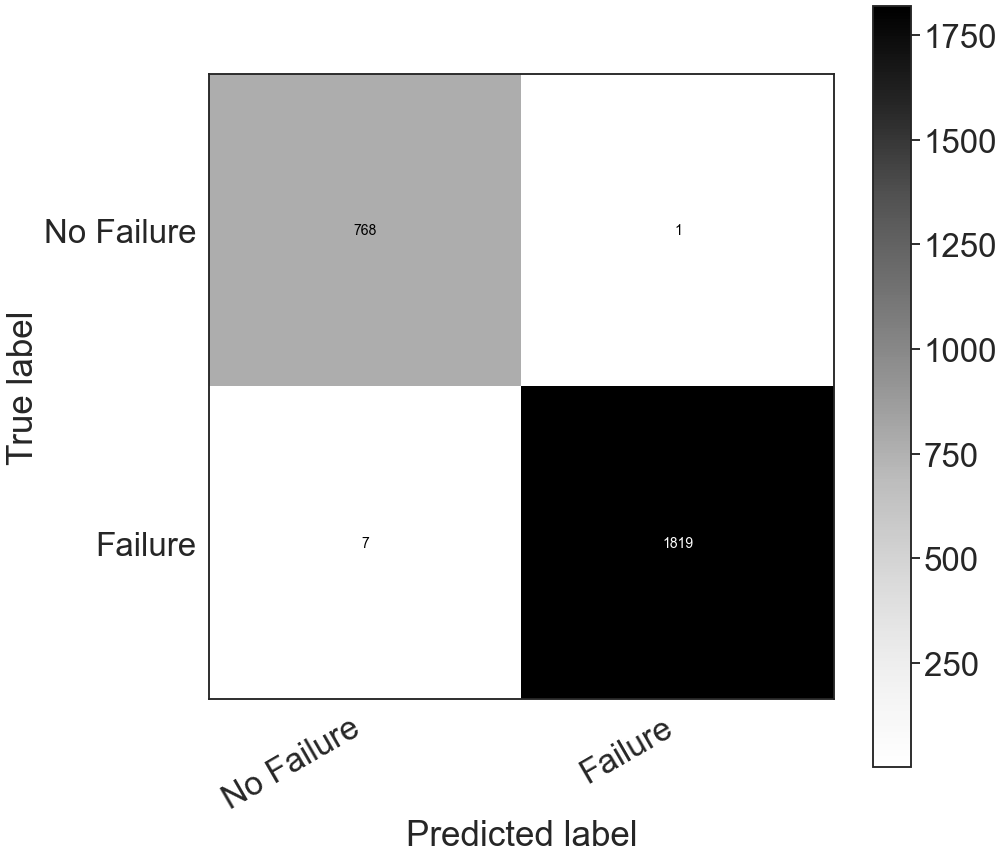

In [ ]:
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/adaboostmachinestatusEF.png')


The machine status classification works well.

()

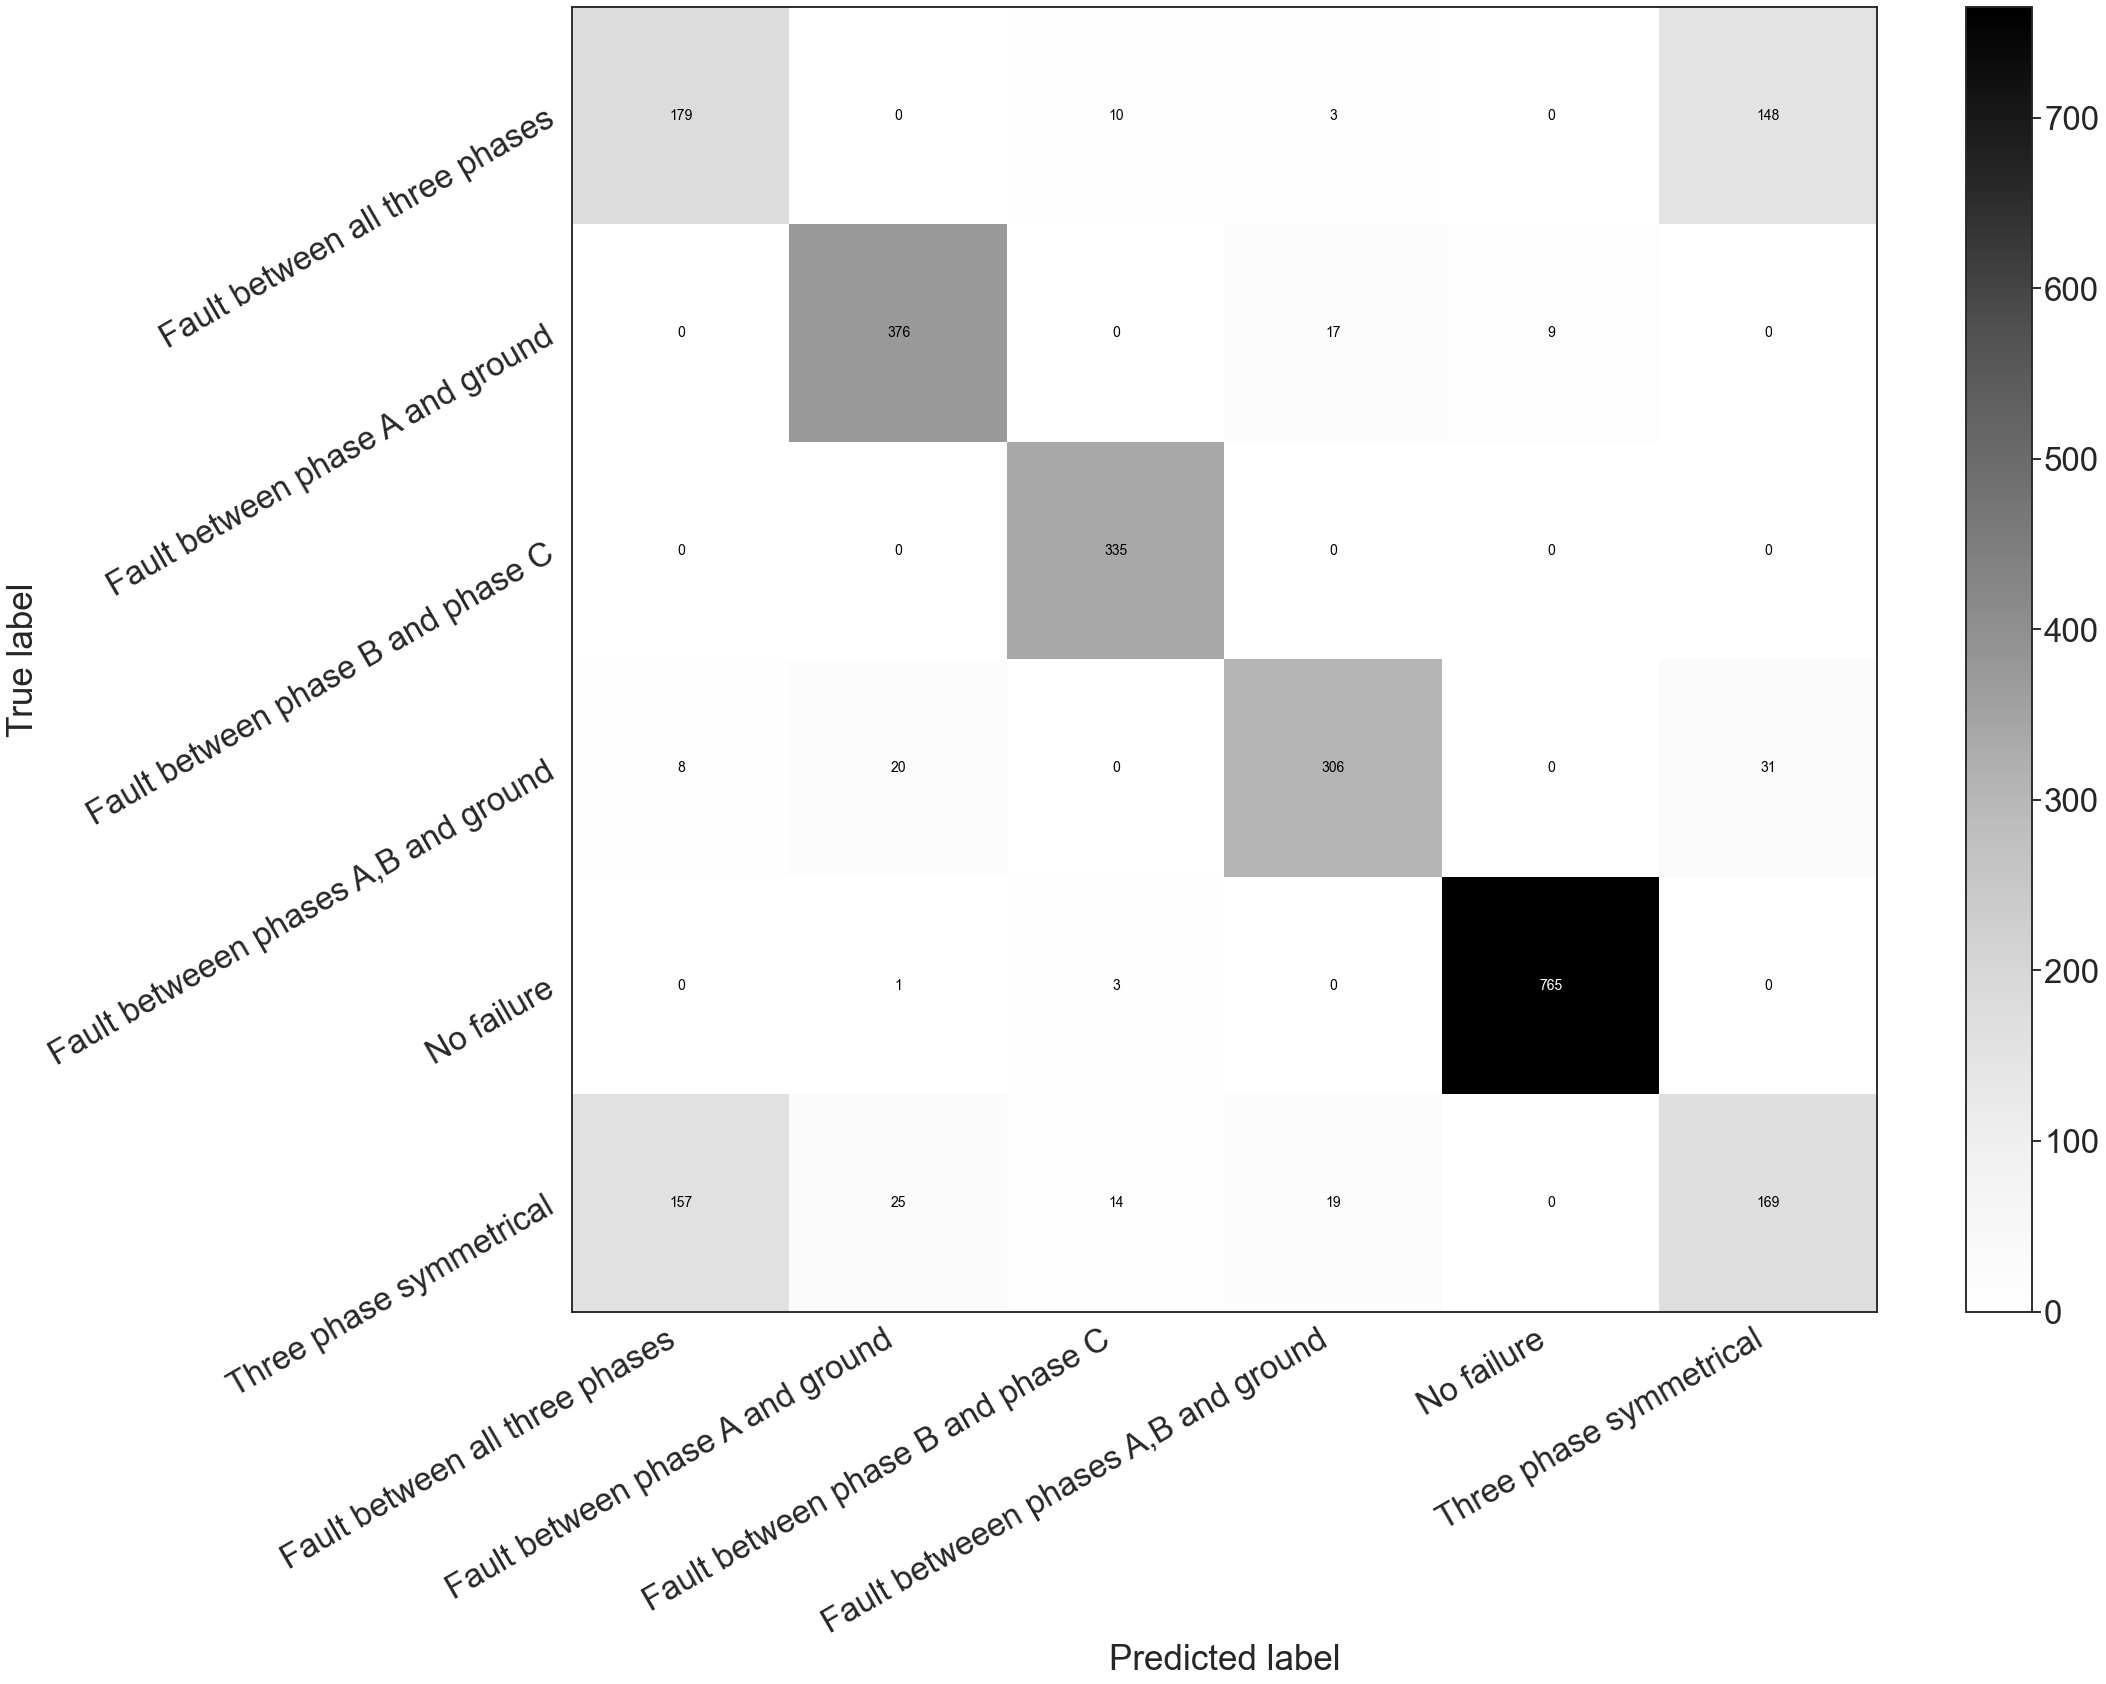

In [ ]:
confusion_failure_type(split[5],y_pred_test,['Fault between all three phases','Fault between phase A and ground','Fault between phase B and phase C','Fault betweeen phases A,B and ground','No failure','Three phase symmetrical'])
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/adaboostfailuretypeEF.png')


In [ ]:
# random forest
params_rf=grid_rfm_cv(split[2],split[4],'micro')

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        |  0.7868   |  7.285    |  0.8338   |  110.5    |
|  2        |  0.7934   |  8.385    |  0.8591   |  90.44    |
|  3        |  0.6428   |  3.157    |  0.884    |  96.71    |
|  4        |  0.7711   |  5.364    |  0.9981   |  96.64    |
|  5        |  0.6329   |  3.568    |  0.9339   |  123.5    |
|  6        |  0.747    |  4.92     |  0.8932   |  88.29    |
|  7        |  0.6324   |  3.518    |  0.9802   |  135.6    |
|  8        |  0.7974   |  8.884    |  0.963    |  149.4    |
|  9        |  0.7857   |  7.041    |  0.9628   |  109.5    |
|  10       |  0.6474   |  3.192    |  0.8908   |  87.37    |
|  11       |  0.7948   |  8.721    |  0.9395   |  119.6    |
|  12       |  0.7468   |  4.92     |  0.9997   |  89.66    |
|  13       |  0.7859   |  7.308    |  0.897    |  108.4    |
|  14       |  0.7956   |  8.095    |  0.8646   |  108.0    |
|  15   

In [ ]:
# predict test labels
classifier = RandomForestClassifier(random_state=123,**params_rf)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  83.93 %
Test Recall (Failure Type)         :  83.93 %
Test F1-Score (Failure Type) :  83.93 %
Test Balanced Accuracy Score (Failure Type): 80.74 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  80.92 %
Test Recall (Failure Type)         :  80.74 %
Test F1-Score (Failure Type) :  80.82 %
Test Balanced Accuracy Score (Failure Type): 80.74 %
()


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.95 %
Test Recall (Machine Status)         :  99.89 %
Test F1-score (Machine Status) :  99.92 %
()


()

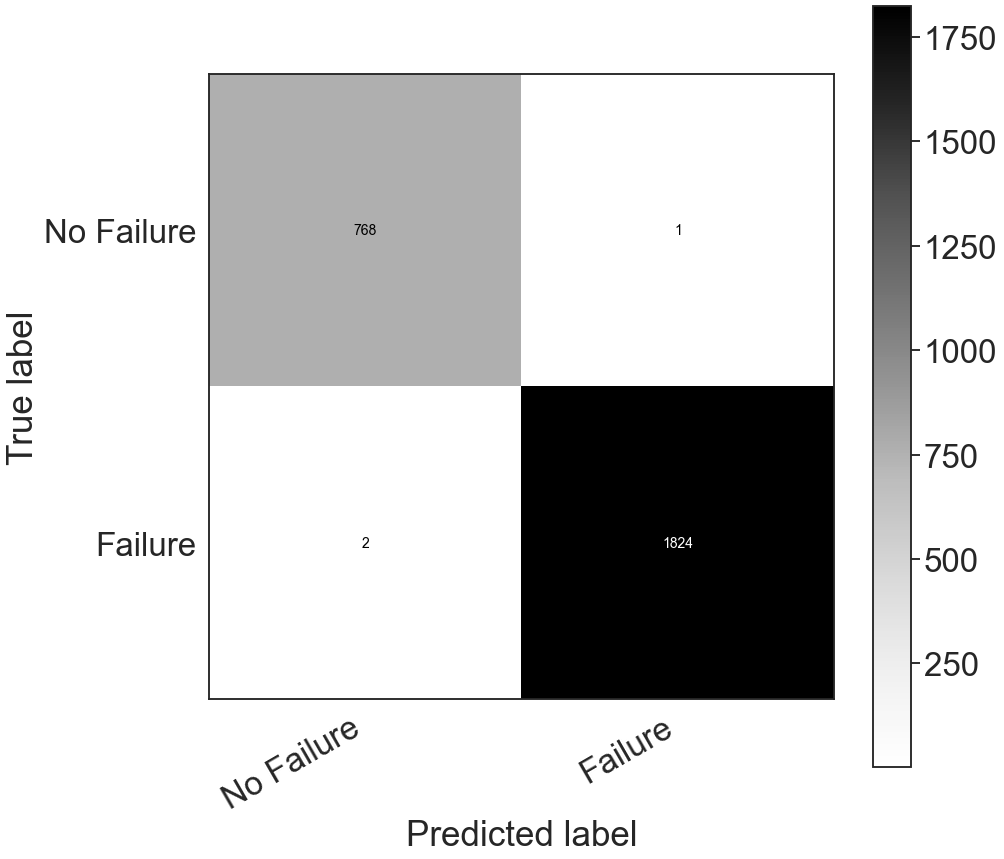

In [ ]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/randomforestmachinestatusEF.png')

Machine status classification is outstanding as in case of the previous two models. 

()

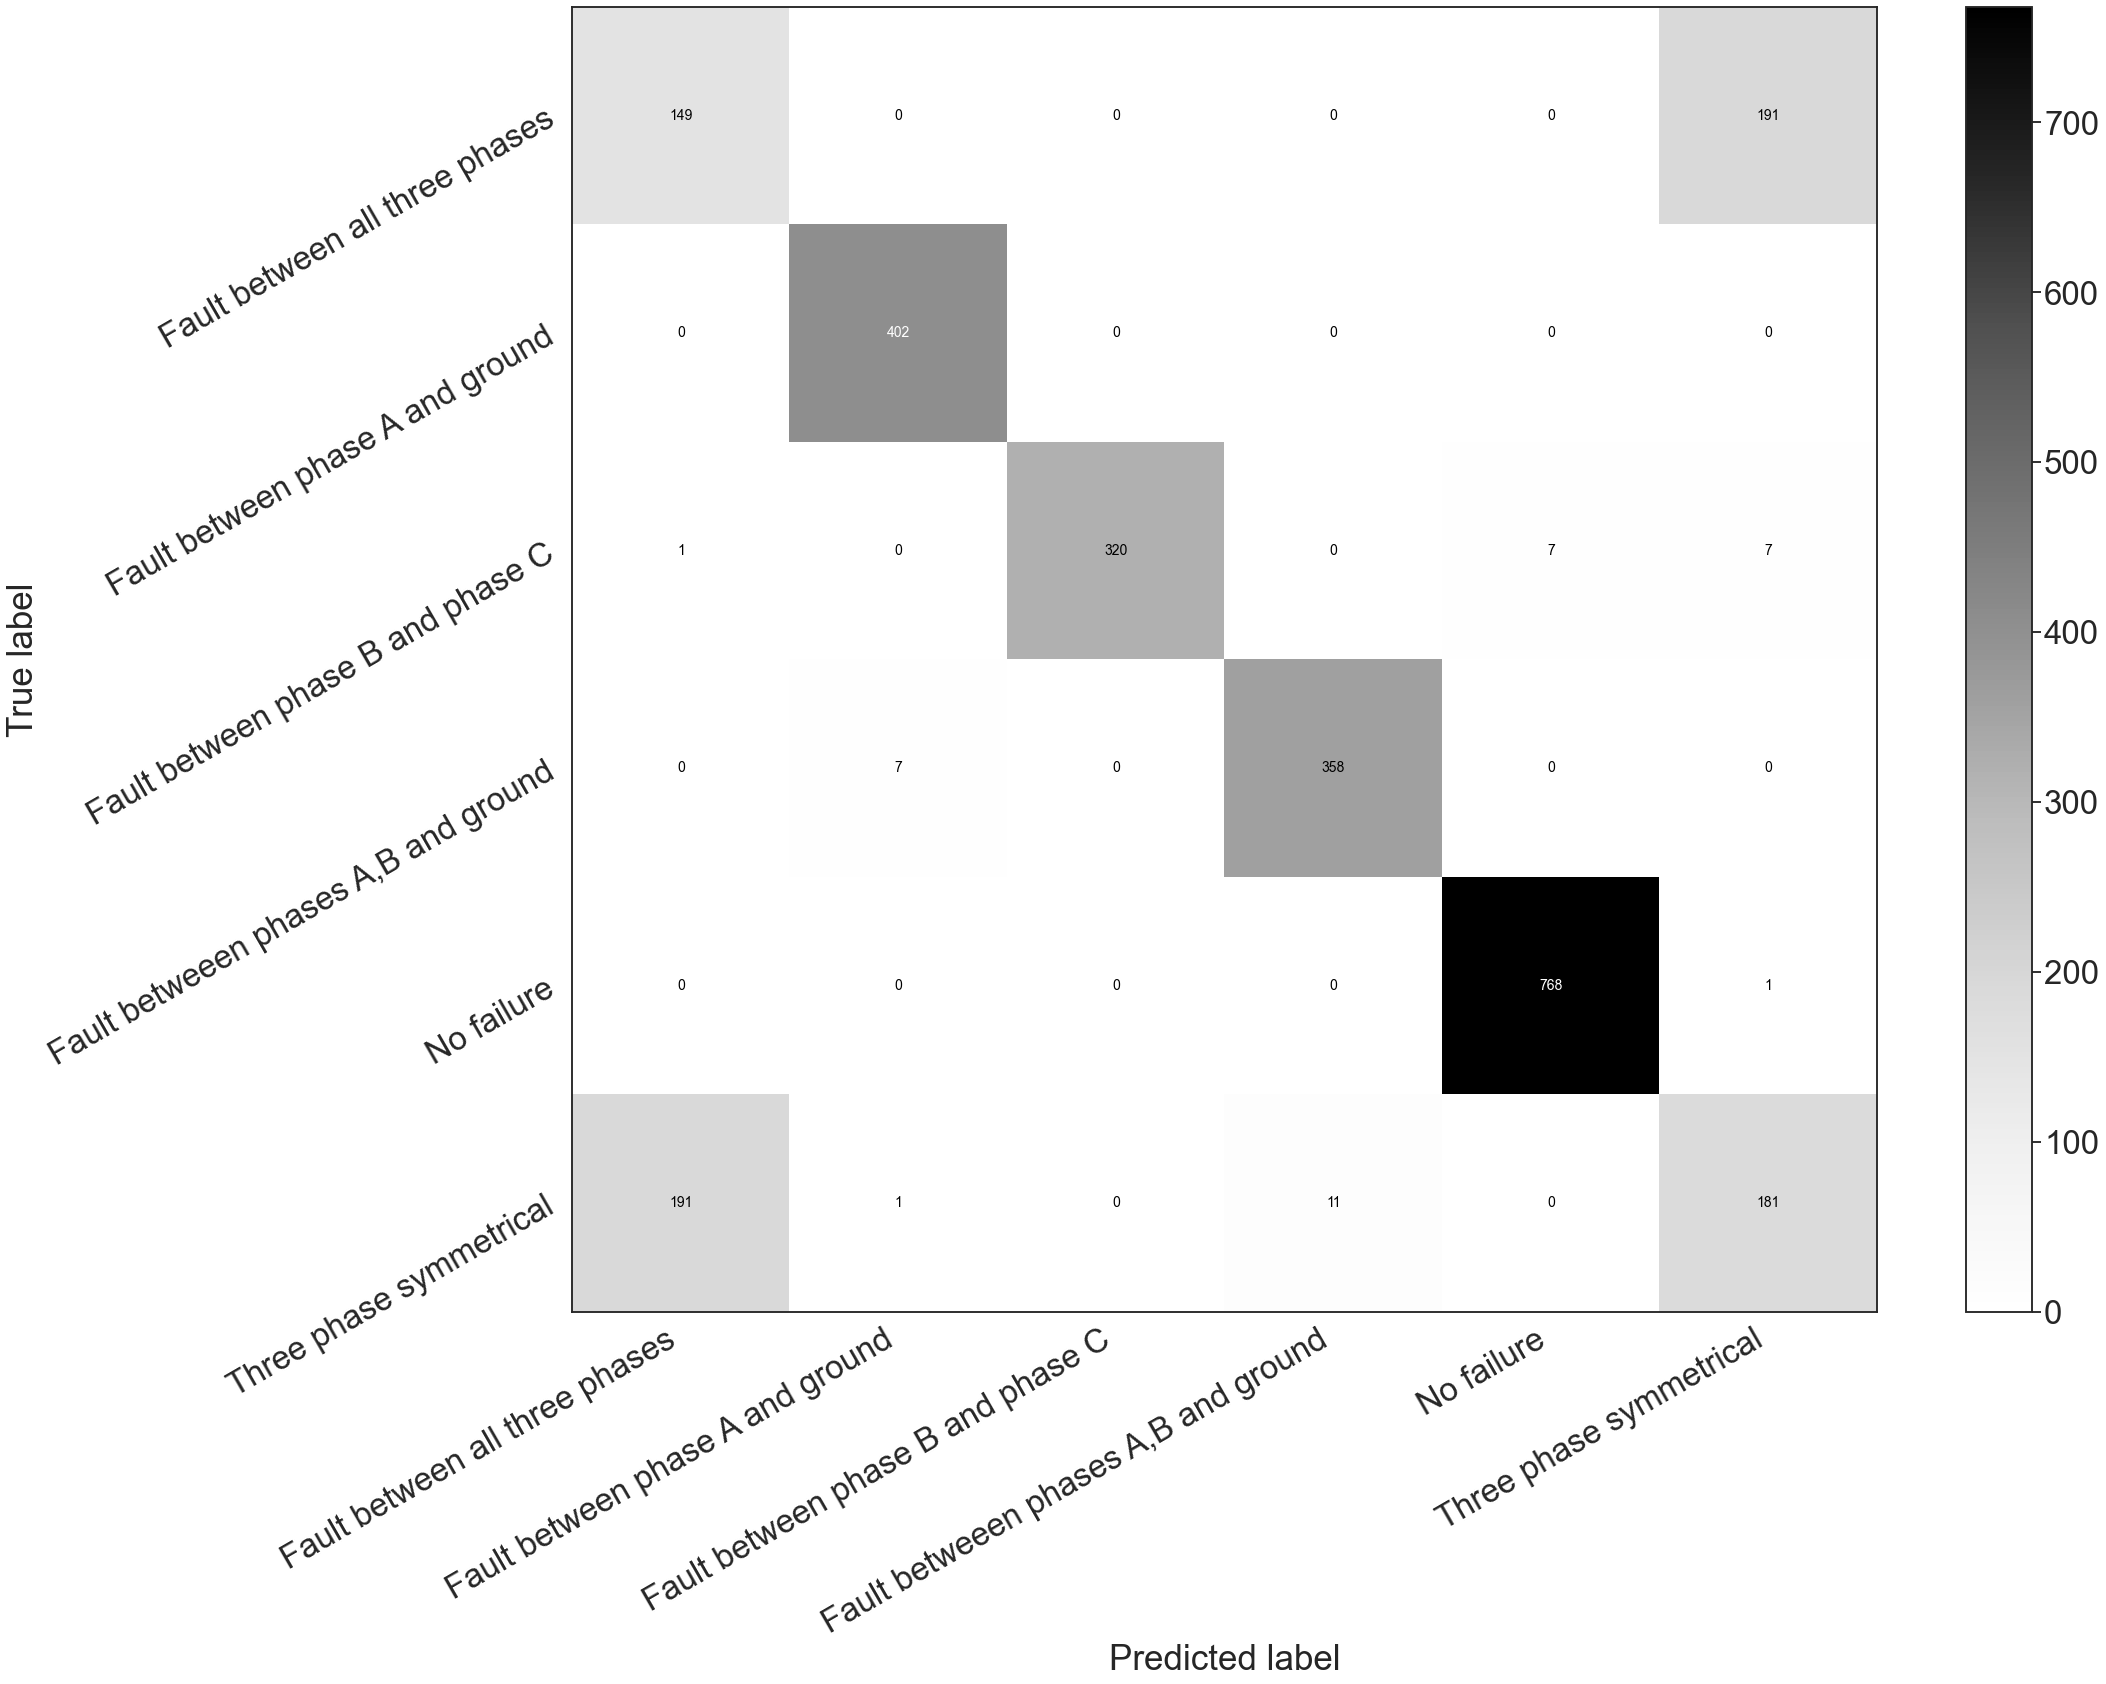

In [ ]:
confusion_failure_type(split[5],y_pred_test,['Fault between all three phases','Fault between phase A and ground','Fault between phase B and phase C','Fault betweeen phases A,B and ground','No failure','Three phase symmetrical'])
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/randomforestfailuretypeEF.png')

In [ ]:
# neural network
params_mlp=grid_nn_ef_cv(split[2],split[4],'micro')

|   iter    |  target   | activa... |   alpha   | batch_... | early_... | initia... | max_iter  | momentum  | neurons1  | optimizer | valida... |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.8688   |  2.443    |  0.001699 |  64.84    |  1.531    |  0.883    |  1.015e+0 |  0.02248  |  11.52    |  0.7137   |  0.3343   |
|  2        |  0.8099   |  3.953    |  0.002385 |  25.09    |  1.333    |  1.858    |  1.027e+0 |  0.4662   |  9.71     |  0.2211   |  0.8918   |
|  3        |  0.1667   |  3.168    |  0.008407 |  107.3    |  1.972    |  1.726    |  1.081e+0 |  0.4213   |  9.165    |  1.358    |  0.1043   |
|  4        |  0.1641   |  3.261    |  0.00698  |  79.31    |  0.5457   |  2.985    |  1.014e+0 |  0.6154   |  11.91    |  1.211    |  0.7206   |
|  5        |  0.7652   |  1.288    |  0.004011 |  51.72    |  1.885    |  2.747    |  1.081e+0 |  0.03408  |  14.66    |  2

In [ ]:
classifier = MLPClassifier(random_state=123,**params_mlp)
multi_target_classifier = MultiOutputClassifier(classifier, n_jobs=-1)
multi_target_classifier.fit(split[2], split[4])
y_pred_test=multi_target_classifier.predict(split[3])

In [ ]:
# Performance Metrics micro
print(performance_failure_type(split[5],y_pred_test,'micro'))

Test Precision (Failure Type)      :  99.04 %
Test Recall (Failure Type)         :  99.04 %
Test F1-Score (Failure Type) :  99.04 %
Test Balanced Accuracy Score (Failure Type): 98.9 %
()


In [ ]:
# Performance Metrics macro
print(performance_failure_type(split[5],y_pred_test,'macro'))

Test Precision (Failure Type)      :  99.01 %
Test Recall (Failure Type)         :  98.9 %
Test F1-Score (Failure Type) :  98.95 %
Test Balanced Accuracy Score (Failure Type): 98.9 %
()


In [ ]:
# Performance Metrics Machine Status
print(performance_machine_status(split[5],y_pred_test))

Test Precision (Machine Status)      :  99.95 %
Test Recall (Machine Status)         :  100.0 %
Test F1-score (Machine Status) :  99.97 %
()


()

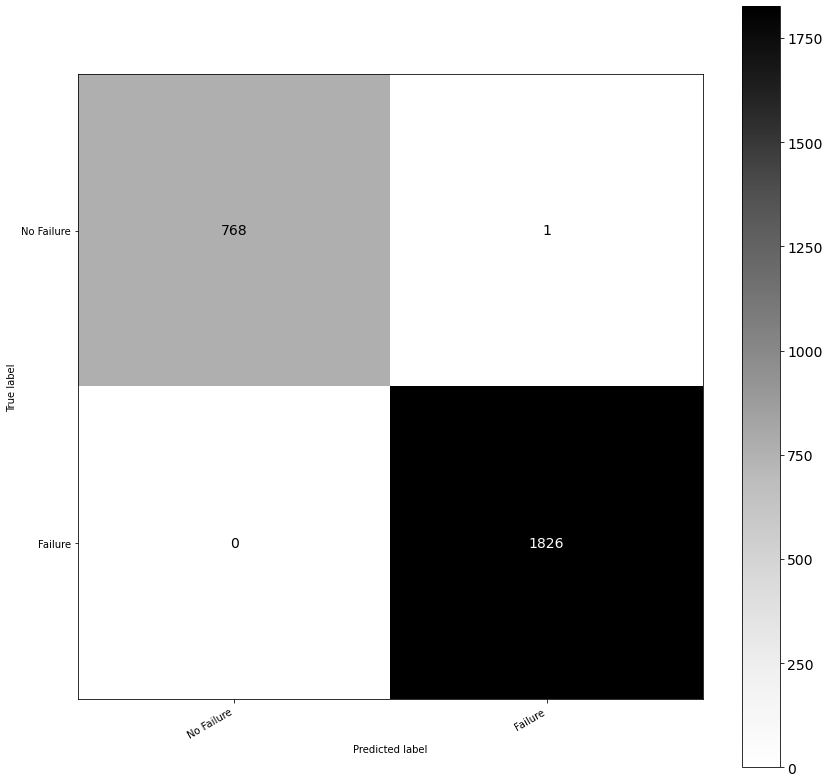

In [ ]:
# Confusion Matrix
confusion_machine_status(split[5],y_pred_test,)
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/nnmachinestatusEF.png')

()

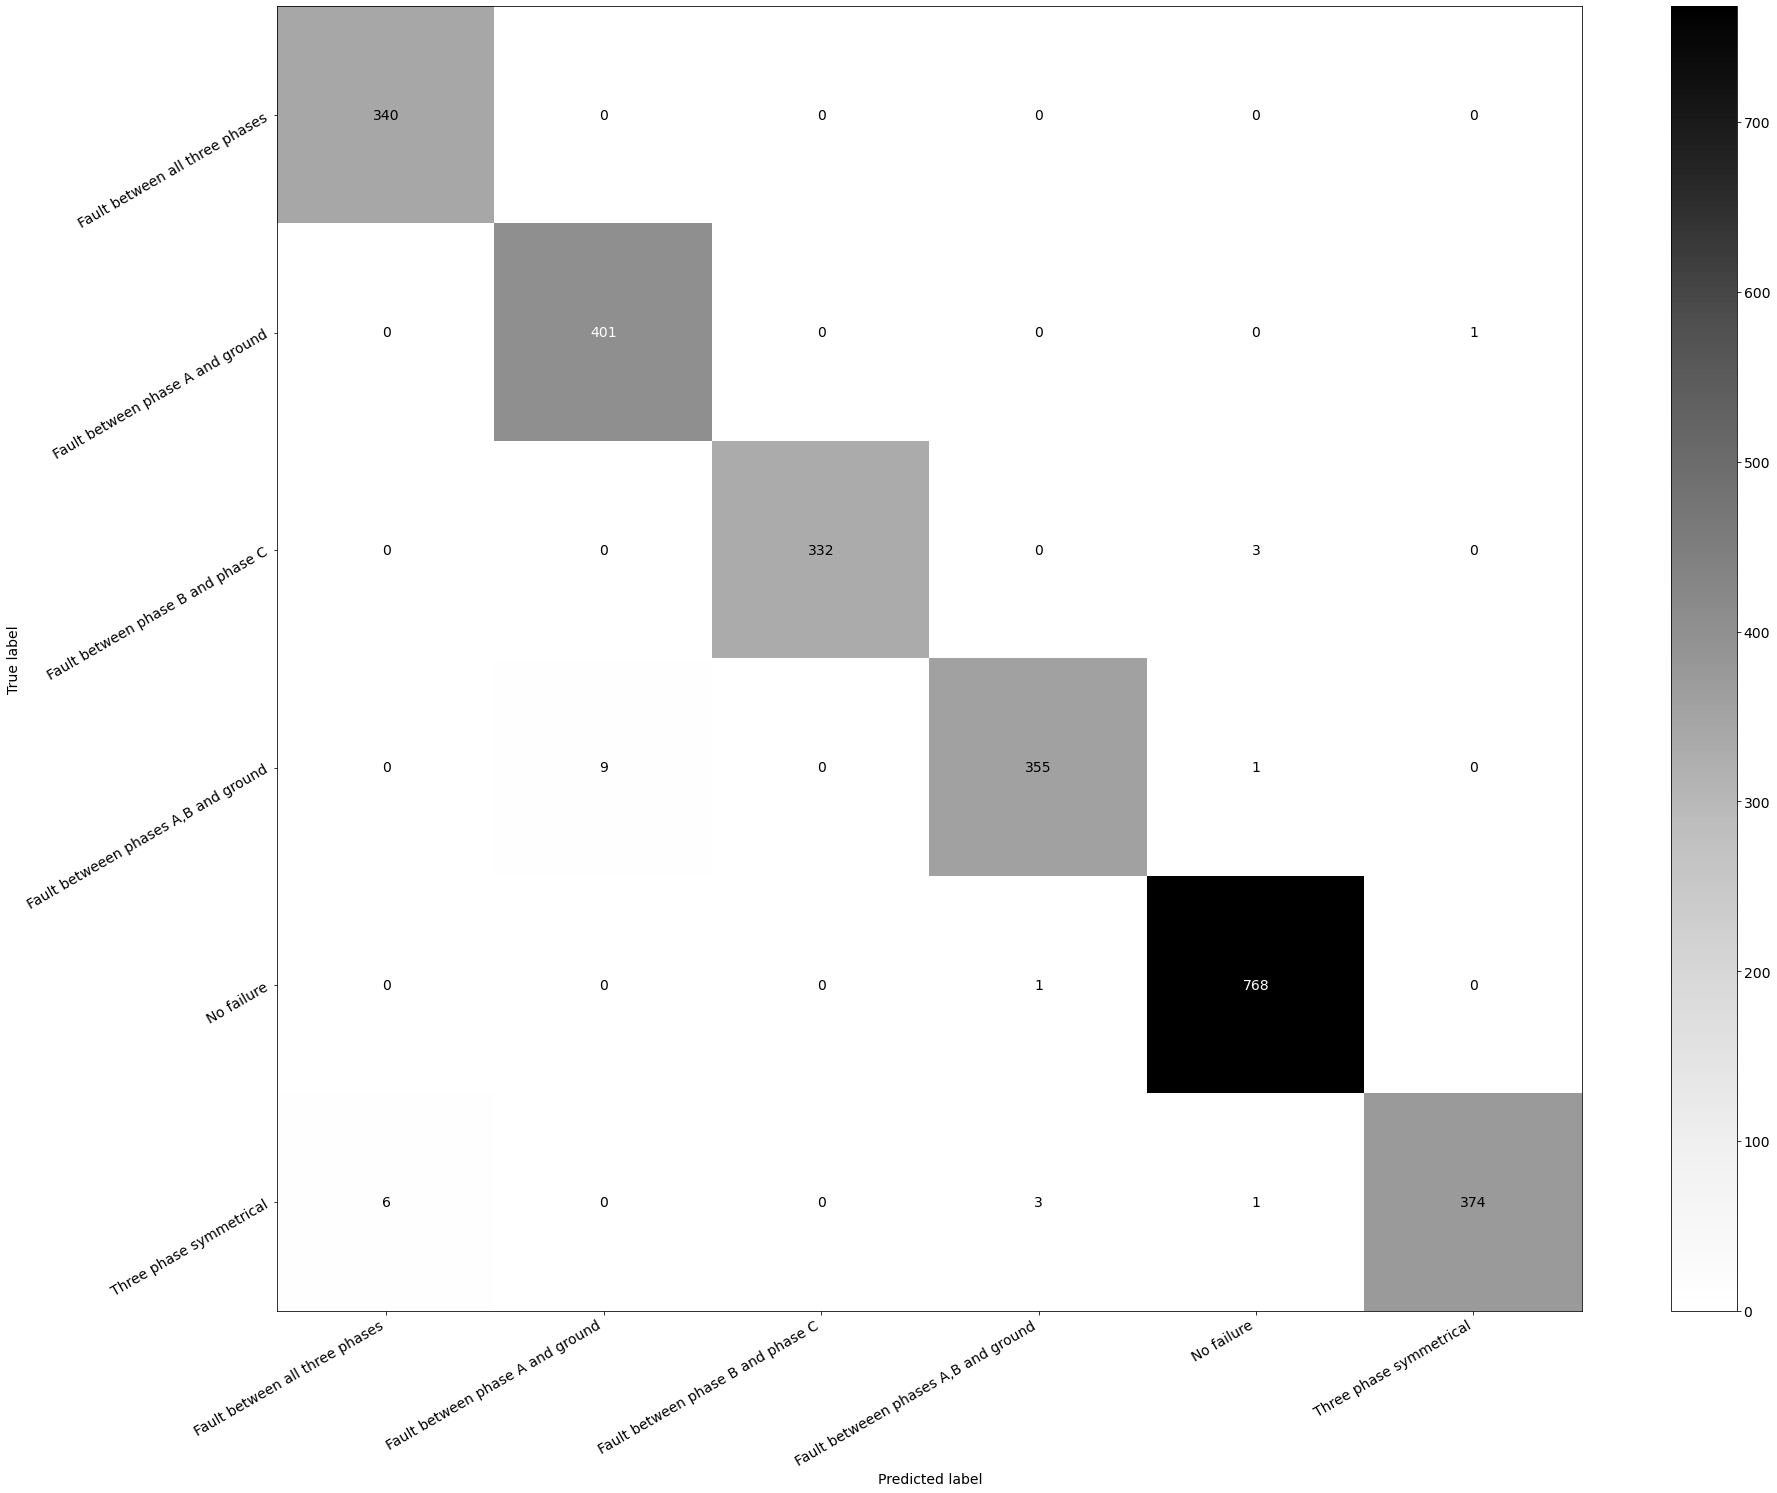

In [ ]:
confusion_failure_type(split[5],y_pred_test,['Fault between all three phases','Fault between phase A and ground','Fault between phase B and phase C','Fault betweeen phases A,B and ground','No failure','Three phase symmetrical'])
#plt.savefig('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/imagesEF/nnfailuretypeEF.png')